## Normalización

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (15,15) 
pd.options.display.max_columns = None 

import sys
sys.path.append("../../")
from src import funciones as fun
from src import variables as var

In [2]:
df = pd.read_pickle('../archivos/coste_vida_limpio.pkl')

In [3]:
df.head(2)

,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
0,South Korea,6.15,3.93,2.20,3.53,4.04,10.58,41.61,3.71,1.05,15.36,2.12,3.46,1.00,0.92,1.43,182.13,22.48,55.88,9.60,404.15,17902.55,1731.08,2689.62
1,China,5.69,3.98,2.74,1.22,2.22,4.86,13.12,1.60,0.64,14.24,0.94,3.56,0.57,0.43,1.20,66.00,17.07,63.49,8.54,1382.62,26379.45,1561.59,1419.87


1- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste

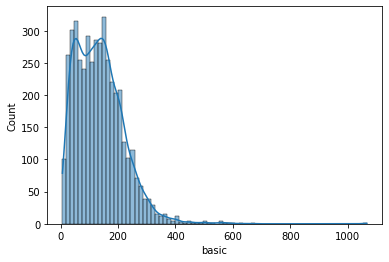

In [5]:
sns.histplot(df['basic'], kde=True);

In [6]:
stats.shapiro(df["basic"])

ShapiroResult(statistic=0.9166607856750488, pvalue=2.802596928649634e-44)

Confirmamos una vez más que nuestra variable dependiente no sigue un adistribución normal. Empleamos directamente el método BoxCox para intentarlo ya que su distribución dista significativamente de la deseada.

In [8]:
df['basic_boxcox'], lambda_ajustada = stats.boxcox(df['basic'])

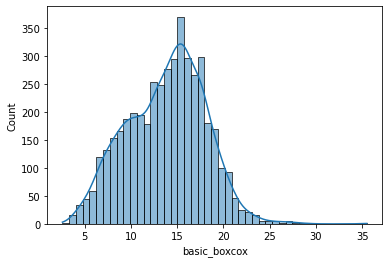

In [10]:
sns.histplot(df['basic_boxcox'], kde=True);

In [9]:
stats.shapiro(df["basic_boxcox"])

ShapiroResult(statistic=0.9899473190307617, pvalue=2.695348339105462e-17)

Aunque tras la transformación el **pvalue** ha mejorado, sigue estando muy alejadao del valor deseado (> 0.05), por lo que tenemos que conlcuir que nuestra variable respuesta no puede normalizarse.

Esto nos lleva a la conclusión nuevamente de que no podremos utilizar un modelo de regresión lineal.

2- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [13]:
df.head()

,city,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,square_meter_incentre,monthly_salary,mortgage,basic_boxcox
0,Seoul,South Korea,6.15,3.93,2.20,3.53,4.04,10.58,41.61,3.71,1.05,15.36,2.12,3.46,1.00,0.92,1.43,182.13,22.48,55.88,9.60,404.15,17902.55,1731.08,22067.70,2689.62,3.47,16.271842
1,Shanghai,China,5.69,3.98,2.74,1.22,2.22,4.86,13.12,1.60,0.64,14.24,0.94,3.56,0.57,0.43,1.20,66.00,17.07,63.49,8.54,1382.62,26379.45,1561.59,17746.11,1419.87,5.03,10.244243
2,Guangzhou,China,4.98,3.54,1.91,1.03,1.71,3.77,11.75,1.44,0.51,11.39,0.95,3.70,0.36,0.37,1.19,59.65,16.66,34.17,8.54,555.18,24556.21,688.05,12892.82,1211.68,5.19,9.760717
3,Mumbai,India,3.68,2.48,0.75,0.83,0.95,3.69,5.95,0.67,0.35,9.83,2.27,4.30,0.25,0.31,1.35,43.57,9.33,25.37,4.30,107.07,3682.67,699.80,6092.45,640.81,7.96,8.371859
4,Delhi,India,4.30,1.77,0.73,0.85,1.02,3.81,5.71,0.75,0.36,9.83,1.54,4.30,0.49,0.22,1.24,58.07,7.95,21.20,4.91,74.00,1964.24,329.15,2506.73,586.46,8.06,9.635477


In [13]:
df.to_pickle('../archivos/coste_vida_boxcox.pkl')